In [41]:
import pandas as pd

# 定義列名
col_names = [
    'src_port', 
    'dst_port', 
    'bidirectional_first_seen_ms', 
    'bidirectional_last_seen_ms', 
    'bidirectional_bytes', 
    'exceeds_threshold'
]

# 設置 CSV 文件路徑 (要換成自己的路徑)
file_path = r'C:\Users\user\OneDrive\文件\畢業專題\csv\nfyt(music).csv'

# 讀取 CSV 文件
net = pd.read_csv(file_path, header=None, names=col_names, low_memory=False)

# 去掉第一行（因為第一行現在是數據行而不是列標題）
net = net.iloc[1:, :]

# 顯示前幾行數據
net.head()


,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,exceeds_threshold
1,62311,443,1723441125033,1723441126553,7877,0
2,443,61234,1723441047330,1723441155103,10612422,0
3,443,61233,1723441047332,1723441155103,7285583,0
4,49440,443,1723441204248,1723441204511,434,0
5,61216,443,1723441197477,1723441197644,438,0


In [42]:
# 設置 CSV 文件路徑
file_path_2 = r'C:\Users\user\Downloads\0805output (1).csv'

# 讀取 CSV 文件
net2 = pd.read_csv(file_path_2, header=None, names=col_names, low_memory=False)

# 去掉第一行（因為第一行現在是數據行而不是列標題）
net2 = net2.iloc[1:, :]

# 顯示前幾行數據
net2.head()


,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,exceeds_threshold
1,56844,80,1721736185080,1721736190801,27780,0
2,49438,443,1721736121954,1721736189586,1231,0
3,49438,443,1721736363044,1721736369621,1240,0
4,49438,443,1721736549348,1721736549614,434,0
5,49438,443,1721736729351,1721736729611,434,0


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#split dataset in features and target variable

feature_cols =['src_port', 'dst_port', 'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms',  'bidirectional_bytes']
feature_cols2 = ['exceeds_threshold']
X_data = net[feature_cols].values # Features
y = net['exceeds_threshold'].values # Target variable

X2_data = net2[feature_cols].values # Features
y2 = net2['exceeds_threshold'].values # Target variable

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100000))
X = scaler.fit_transform(X_data)
X_data2 = scaler.fit_transform(X2_data)

In [45]:
# 將 y 轉換為數值型
y = y.astype(int)
y2 = y2.astype(int)

SVM
Cross-validation scores on net1: [0.9966996699669967, 0.9966996699669967, 0.9983498349834984, 1.0, 0.9950413223140496]
Average cross-validation score on net1: 0.9973580994463083
Accuracy on net2: 1.0000


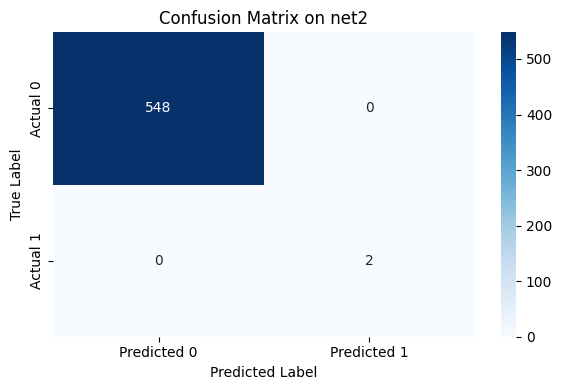

In [46]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("SVM")

# 確保所有標籤都是整數型
y = y.astype(int)
y2 = y2.astype(int)

# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 SVM 模型
clf = svm.SVC(kernel='linear', C=1)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    clf.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = clf.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = clf.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


LogisticRegression
Cross-validation scores on net1: [0.9966996699669967, 0.9966996699669967, 1.0, 1.0, 0.9933884297520661]
Average cross-validation score on net1: 0.9973575539372119
Accuracy on net2: 1.0000


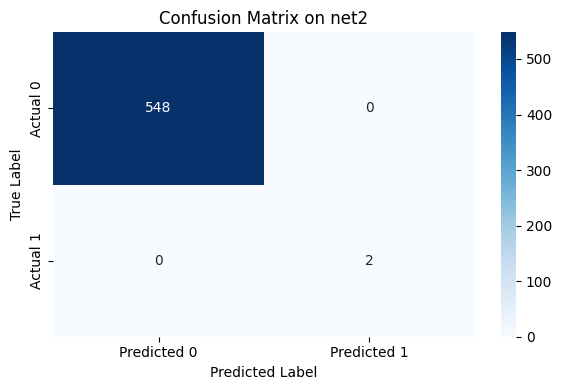

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"LogisticRegression")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 LogisticRegression 模型
logreg = LogisticRegression(random_state=0)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    logreg.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = logreg.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = logreg.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


RandomForestClassifier
Cross-validation scores on net1: [1.0, 0.9983498349834984, 1.0, 1.0, 1.0]
Average cross-validation score on net1: 0.9996699669966997
Accuracy on net2: 0.9982


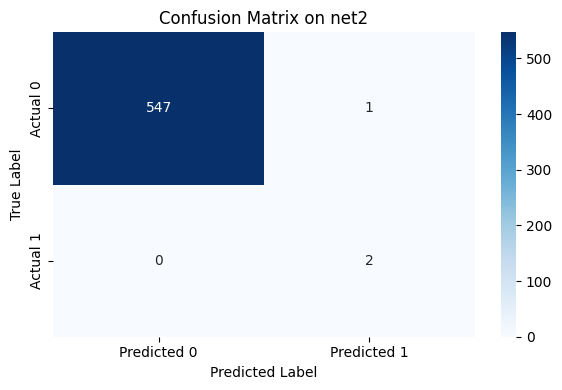

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"RandomForestClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 RandomForest 模型
randomForestModel = RandomForestClassifier(n_estimators=100)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    randomForestModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = randomForestModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = randomForestModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


GaussianNB
Cross-validation scores on net1: [0.9933993399339934, 0.9818481848184818, 0.966996699669967, 0.7722772277227723, 0.9851239669421488]
Average cross-validation score on net1: 0.9399290838174726
Accuracy on net2: 0.9491


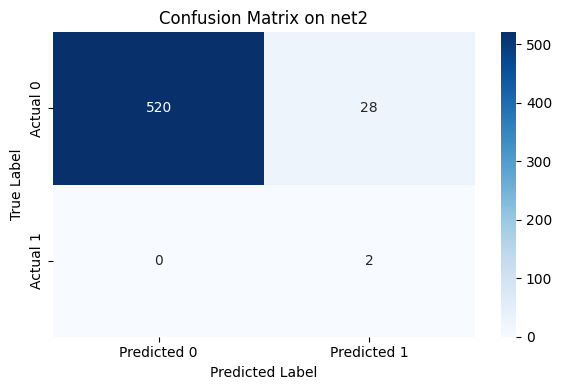

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"GaussianNB")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 GaussianNB 模型
GaussianNBModel = GaussianNB()


# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    GaussianNBModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = GaussianNBModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = GaussianNBModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


LinearDiscriminantAnalysisMOdel
Cross-validation scores on net1: [0.9983498349834984, 0.9966996699669967, 0.995049504950495, 1.0, 0.9900826446280991]
Average cross-validation score on net1: 0.9960363309058179
Accuracy on net2: 1.0000


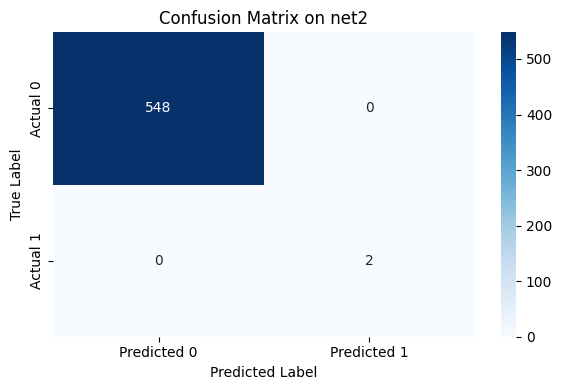

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"LinearDiscriminantAnalysisMOdel")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 LinearDiscriminantAnalysis 模型
LinearDiscriminantAnalysisMOdel= LinearDiscriminantAnalysis(n_components=1)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    LinearDiscriminantAnalysisMOdel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = LinearDiscriminantAnalysisMOdel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)
    
 
# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = LinearDiscriminantAnalysisMOdel.predict(X_data2)
    

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


KNeighborsClassifier
Cross-validation scores on net1: [0.995049504950495, 0.995049504950495, 0.9900990099009901, 1.0, 0.9834710743801653]
Average cross-validation score on net1: 0.9927338188364292
Accuracy on net2: 1.0000


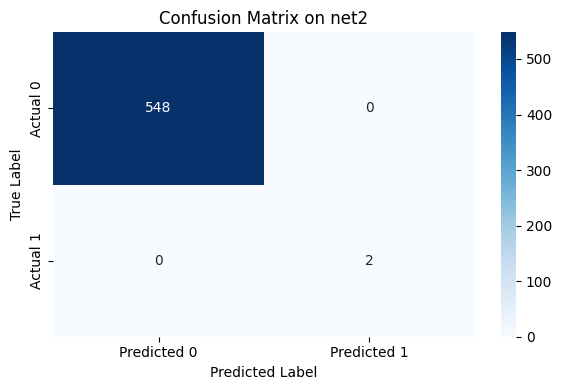

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"KNeighborsClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 KNeighbors 模型
KNeighborsClassifierModel= KNeighborsClassifier(n_neighbors=1)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    KNeighborsClassifierModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = KNeighborsClassifierModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = KNeighborsClassifierModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


DecisionTreeClassifier
Cross-validation scores on net1: [1.0, 1.0, 1.0, 1.0, 1.0]
Average cross-validation score on net1: 1.0
Accuracy on net2: 0.9982


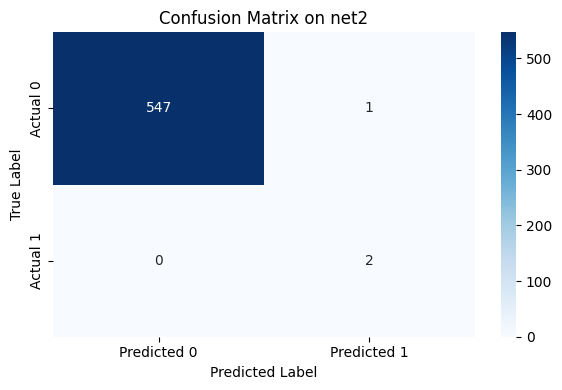

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print(f"DecisionTreeClassifier")
# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 定義 DecisionTreeClassifier 模型
DecisionTreeClassifierModel= DecisionTreeClassifier(random_state=0)

# 初始化存儲混淆矩陣的列表
cnf_matrices = []
scores = []

# 進行5折交叉驗證（僅在 net1 上分割）
for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
    X_train, X_validation = X[train_indices], X[validation_indices]
    y_train, y_validation = y[train_indices], y[validation_indices]
    
    # 訓練模型
    DecisionTreeClassifierModel.fit(X_train, y_train)
    
    # 使用 net1 的驗證集進行測試
    y_pred_val = DecisionTreeClassifierModel.predict(X_validation)
    
    # 計算 net1 驗證集的準確率
    fold_accuracy = accuracy_score(y_validation, y_pred_val)
    scores.append(fold_accuracy)
    
    # 計算 net1 驗證集的混淆矩陣
    cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
    cnf_matrices.append(cnf_matrix_val)

# 在 net1 上的 KFold 交叉驗證結果
print("Cross-validation scores on net1:", scores)
print("Average cross-validation score on net1:", sum(scores) / len(scores))

# 使用訓練好的模型對 net2 進行預測
y_pred_net2 = DecisionTreeClassifierModel.predict(X_data2)

# 計算 net2 上的準確率和混淆矩陣
accuracy_net2 = accuracy_score(y2, y_pred_net2)
cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])

print(f"Accuracy on net2: {accuracy_net2:.4f}")

# 繪製 net2 的混淆矩陣
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix_net2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on net2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Accuracy on net2 for SVM: 1.0000
Accuracy on net2 for Logistic Regression: 1.0000
Accuracy on net2 for Random Forest: 0.9982
Accuracy on net2 for GaussianNB: 0.9491
Accuracy on net2 for LDA: 1.0000
Accuracy on net2 for KNeighbors: 1.0000
Accuracy on net2 for Decision Tree: 0.9982


<Figure size 640x480 with 0 Axes>

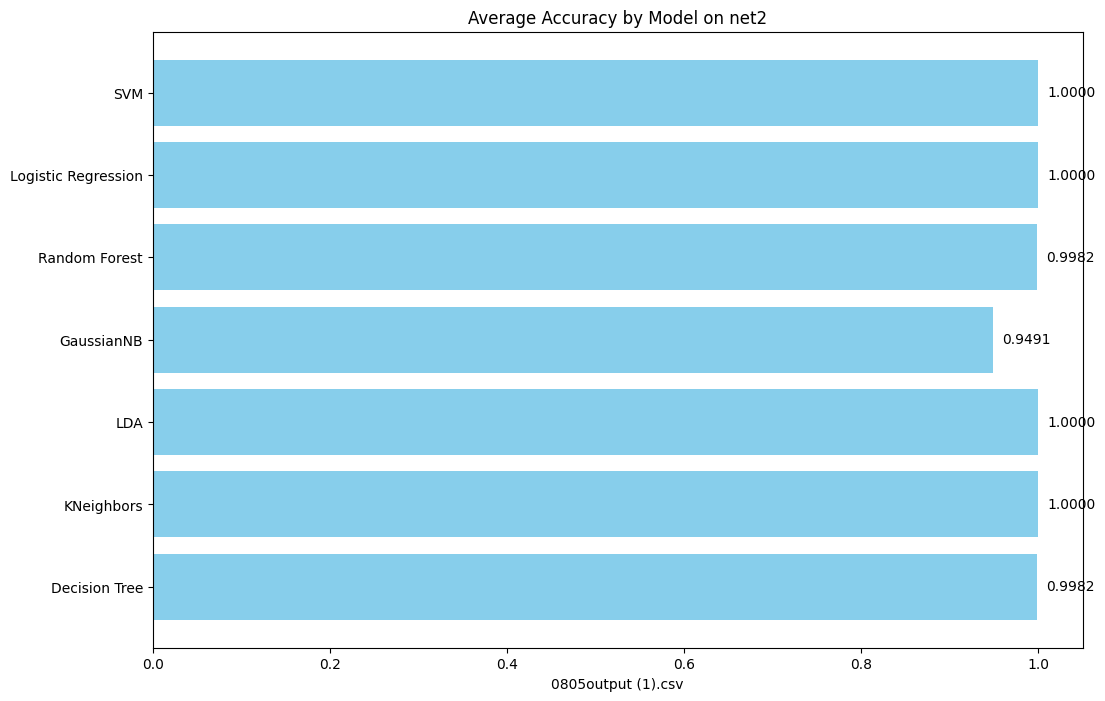

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm, linear_model, ensemble, neighbors, naive_bayes, discriminant_analysis, tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import os

# 假設 net1_X, net1_y 是 net1 數據集的特徵和標籤
# 假設 net2_X, net2_y 是 net2 數據集的特徵和標籤

# 定義 KFold 分割器
kf = KFold(n_splits=5)

# 初始化模型
models = {
    "SVM": svm.SVC(kernel='linear', C=1),
    "Logistic Regression":LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "GaussianNB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(n_components=1),
    "KNeighbors":  KNeighborsClassifier(n_neighbors=1),
    "Decision Tree":DecisionTreeClassifier(random_state=0)
}
# 存儲每個模型在 net2 上的混淆矩陣和準確率
net2_cnf_matrices = {}
net2_scores = {}

# 訓練和測試每個模型
for name, model in models.items():
    
    
    # 存儲 KFold 結果
    cnf_matrices = []
    scores = []
    
    # 進行5折交叉驗證（僅在 net1 上分割）
    for fold, (train_indices, validation_indices) in enumerate(kf.split(X, y), 1):
        X_train, X_validation = X[train_indices], X[validation_indices]
        y_train, y_validation = y[train_indices], y[validation_indices]
        
        # 訓練模型
        model.fit(X_train, y_train)
        
        # 使用 net1 的驗證集進行測試
        y_pred_val = model.predict(X_validation)
        
        # 計算 net1 驗證集的準確率
        fold_accuracy = accuracy_score(y_validation, y_pred_val)
        scores.append(fold_accuracy)
        
        # 計算 net1 驗證集的混淆矩陣
        cnf_matrix_val = confusion_matrix(y_validation, y_pred_val, labels=[0, 1])
        cnf_matrices.append(cnf_matrix_val)
    
    # 使用訓練好的模型對 net2 進行預測
    y_pred_net2 = model.predict(X_data2)
    
    # 計算 net2 上的準確率和混淆矩陣
    accuracy_net2 = accuracy_score(y2, y_pred_net2)
    cnf_matrix_net2 = confusion_matrix(y2, y_pred_net2, labels=[0, 1])
    
    net2_scores[name] = accuracy_net2
    net2_cnf_matrices[name] = cnf_matrix_net2
    
    print(f"Accuracy on net2 for {name}: {accuracy_net2:.4f}")


plt.tight_layout()
plt.show()


#按指定順序顯示模型
order = [  "Decision Tree","KNeighbors", "LDA","GaussianNB", "Random Forest","Logistic Regression","SVM" ]

# 繪製模型在 net2 上的準確率
plt.figure(figsize=(12, 8))
bars = plt.barh(order, [net2_scores[name] for name in order], color='skyblue')
file_name2 = os.path.basename(file_path_2)
plt.xlabel(file_name2)
plt.title('Average Accuracy by Model on net2')

# 在每個條形上顯示數字
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', va='center')

plt.show()